# Read inputs

In [1]:
# Read techno-economic assumptions and transport distances for transport cost calculation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [38]:
#Definition of variables for pipeline transport costs
tea_pipe = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='Pipeline Transport', decimal=',', index_col=0)
tea_pipe

,Parameter,Reference,2020
ID,,,
Discount rate [%],0.08,NaN,NaN
Offshore Capex cost factor,1.7,EHB 2022; IRENA 2022,NaN
Pipeline Opex [€/a as % of Capex],0.017,NaN,NaN
Compressor Opex [€/a as % of Capex],0.009,NaN,NaN
Low - Compression capacity @ 48inch [MW_el/1000km],190,EHB 2020,NaN
...,...,...,...
High - retrofit Offshore (EHB 2022) Capex Compression [€/kg/1000km],1.06,NaN,NaN
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN


In [39]:
tra_d = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='Transport Distances', decimal=',')
tra_d

,Origin_Country,Destination_Country,sea distance (km),onshore distance (km),offshore distance (km),Starting point
0,United Arab Emirates,Germany,12443.10,NaN,NaN,NaN
1,Angola,Germany,9809.65,NaN,NaN,NaN
2,Argentina,Germany,14063.90,NaN,NaN,NaN
3,Austria,Germany,6005.96,500.0,0.0,NaN
4,Australia,Germany,21212.10,NaN,NaN,NaN
...,...,...,...,...,...,...
955,Philippines,China,1782.35,NaN,NaN,NaN
956,Iceland,China,20454.60,NaN,NaN,NaN
957,Papua New Guinea,China,6298.52,NaN,NaN,NaN
958,Cameroon,China,19717.70,NaN,NaN,NaN


In [4]:
# Electrcity wholesale price projections in $_2018/MWh from DNVGL 2018
p_electricity = pd.read_excel('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx', sheet_name='EL Price', decimal=',', index_col=0)
p_electricity

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Wholesale electricity prices from DNV GL 2019,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,36.301651,36.764515,37.137776,37.447974,37.747898,38.034395,38.325658,38.655501,39.015448,39.420264,...,53.573530,51.487746,50.336783,49.802097,49.984233,50.739234,51.993049,53.655694,54.814324,56.468935
Angola,121.494032,119.445089,119.580409,124.653779,131.547459,137.405324,141.246042,142.819290,143.098086,143.128137,...,167.313461,168.277022,168.972257,169.434972,169.825687,170.198308,170.217476,170.039948,170.172216,169.924801
Argentina,37.961027,38.086072,39.032196,40.033404,41.148255,42.353416,43.577189,44.818521,46.021991,47.209332,...,73.409441,72.994100,72.420411,72.137700,71.884240,71.715794,71.547577,71.579187,70.985088,71.383909
Austria,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.118220,45.738344,45.399899,...,49.609330,50.705430,51.925184,53.193310,54.221220,54.704721,54.535295,53.994557,53.715329,53.994428
Australia,72.846428,69.396730,66.622798,64.898776,64.515503,64.897234,65.154315,65.256396,65.134265,64.811898,...,38.939740,37.412280,35.994851,34.709238,33.678074,32.794352,32.137023,31.647242,30.594356,29.930791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,42.402642,44.089299,45.936088,47.946139,50.057150,52.193834,54.433745,57.196590,60.841314,65.569751,...,75.383730,74.831710,74.676203,74.735059,74.746313,74.583895,74.409350,74.323923,74.282002,73.996739
Iceland,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.118220,45.738344,45.399899,...,49.609330,50.705430,51.925184,53.193310,54.221220,54.704721,54.535295,53.994557,53.715329,53.994428
Papua New Guinea,42.402642,44.089299,45.936088,47.946139,50.057150,52.193834,54.433745,57.196590,60.841314,65.569751,...,75.383730,74.831710,74.676203,74.735059,74.746313,74.583895,74.409350,74.323923,74.282002,73.996739


### General inputs

In [5]:
# WACC for all transport investments (pipelines, terminals, liquefaction plants)
i_tra = float(tea_pipe.loc['Discount rate [%]']['Parameter'])
i_tra

0.08

In [6]:
# Economic lifetime for pipelines
l_pipe = float(tea_pipe.loc['Lifetime [Years]']['Parameter'])
l_pipe

40.0

In [7]:
# Amortisation factor for onshore pipelines
alpha = (i_tra * (1 + i_tra)**l_pipe)/(((1 + i_tra)**l_pipe) - 1)
alpha

0.08386016150058534

In [8]:
# Utilisation of the pipeline in %
pipe_use = float(tea_pipe.loc['Pipeline load factor [%]']['Parameter'])
pipe_use

0.75

In [40]:
# Pipeline Opex [€/a as % of Capex]
pipe_opex_share = float(tea_pipe.loc['Pipeline Opex [€/a as % of Capex]']['Parameter'])
pipe_opex_share

0.017

In [41]:
# Compression Opex [€/a as % of Capex]
comp_opex_share = float(tea_pipe.loc['Compressor Opex [€/a as % of Capex]']['Parameter'])
comp_opex_share

0.009

# New pipeline

New onshore pipeline

In [42]:
#Onshore Pipeline capex in [€/kg/100km]
capex_pipe_new_on_EHB = float(tea_pipe.loc['Medium - New Onshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_new_on_EHB

2.8

In [43]:
#Compression capex in [€/kg/100km]
capex_comp_new_on_EHB = float(tea_pipe.loc['Medium - New Onshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_new_on_EHB

0.62

In [49]:
capex_new_on = capex_pipe_new_on_EHB + capex_comp_new_on_EHB
capex_new_on

3.42

In [51]:
opex_new_on = capex_pipe_new_on_EHB * pipe_opex_share + capex_comp_new_on_EHB * comp_opex_share
opex_new_on

0.053180000000000005

New offshore pipeline

In [44]:
# Pipeline capex offshore new [€/kg/1000km]
capex_pipe_new_off_EHB = float(tea_pipe.loc['Medium - New Offshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_new_off_EHB

4.8

In [45]:
# Compression capex offshore new [€/kg/1000km]
capex_comp_new_off_EHB = float(tea_pipe.loc['Medium - New Offshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_new_off_EHB

1.06

In [46]:
capex_new_off = capex_pipe_new_off_EHB + capex_comp_new_off_EHB
capex_new_off

5.859999999999999

In [48]:
opex_new_off = capex_pipe_new_off_EHB * pipe_opex_share + capex_comp_new_off_EHB * comp_opex_share
opex_new_off

0.09114

In [18]:
# Onshore pipeline distance between two countries [km]
d_on = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['onshore distance (km)'].values)
d_on

300.0

In [19]:
#not used here
off_factor = float(tea_pipe.loc['Offshore Capex cost factor ']['Parameter'])
off_factor

1.7

In [20]:
# Offshore pipeline distance between two countries [km]
d_off = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['offshore distance (km)'].values)
d_off

650.0

### Electricity cost of compression

In [21]:
# Compression capacity in [MWel/1000km]
capa_comp = float(tea_pipe.loc['Medium - Compression capacity @ 48inch [MW_el/1000km]']['Parameter'])
capa_comp

260.0

In [22]:
# Load factor in hours/day
lf_comp = float(tea_pipe.loc['Assumed load factor for compressor electricity consumption [h/a]']['Parameter'])
lf_comp

5000.0

In [23]:
#Capacity at full load factor [kg H2/a]
capa_pipe = float(tea_pipe.loc['Capacity at full load factor [kg H2/a]']['Parameter'])
capa_pipe

3416741674.167417

In [89]:
# Electricity cost for compression [€/kg/1000km]
comp_el_cost = capa_comp * pipe_use * 8760 * 50/ capa_pipe
comp_el_cost

0.0249975

## Calc. new pipeline cost

In [62]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_tc_pipe_new():

    result = (((alpha * capex_new_on/pipe_use + opex_new_on) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe))* d_on
    + ((alpha * capex_new_off/pipe_use + opex_new_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off)/1000
    return result

var. input: Electricity price adjusted to EUR

In [63]:
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['New_Pipeline_costs'])
result.index.name = 'Years'

for year in years:

    p_el_y = float(p_electricity.loc['Norway'][year]) * 0.89


    result.New_Pipeline_costs.loc[year] = calculate_tc_pipe_new()

result

,New_Pipeline_costs
Years,
2025,0.610989
2026,0.61076
2027,0.610634
2028,0.610473
2029,0.61033
2030,0.610218
2031,0.61024
2032,0.610366
2033,0.610635


In [30]:
# Create csv file from results dataframe
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'New_pipeline_costs.csv')
result.to_csv(output_file, sep = ';')

## Plot new pipeline costs

# Retrofit pipeline

Retrofit onshore pipeline

In [65]:
#Retrofit onshore Pipeline capex in [€/ kg / 100km]
capex_pipe_retrofit_on_EHB = float(tea_pipe.loc['Medium - Retrofit Onshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_retrofit_on_EHB

0.5

In [66]:
#Compression capex in [€/kg/100km]
capex_comp_retrofit_on_EHB = float(tea_pipe.loc['Medium - New Onshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_retrofit_on_EHB

0.62

In [82]:
capex_retrofit_on = capex_pipe_retrofit_on_EHB + capex_comp_retrofit_on_EHB
capex_retrofit_on

1.12

In [68]:
opex_retrofit_on = capex_pipe_retrofit_on_EHB * pipe_opex_share + capex_comp_retrofit_on_EHB * comp_opex_share
opex_retrofit_on

0.01408

Retrofit offshore pipeline

In [76]:
#Retrofit  capex in [€/kg/100km]
capex_pipe_retrofit_off_EHB = float(tea_pipe.loc['Medium - retrofit Offshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_retrofit_off_EHB

0.5

In [77]:
#Compression capex in [€/kg/100km]
capex_comp_retrofit_off_EHB = float(tea_pipe.loc['Medium - retrofit Offshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_retrofit_off_EHB

1.06

In [80]:
capex_retrofit_off = capex_pipe_retrofit_off_EHB + capex_comp_retrofit_off_EHB
capex_retrofit_off

1.56

In [81]:
opex_retrofit_off = capex_pipe_retrofit_off_EHB * p1ipe_opex_share + capex_comp_retrofit_off_EHB * comp_opex_share
opex_retrofit_off

0.01804

## Calc. retrofit pipeline costs

In [83]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_tc_pipe_retrofit():

    result = (((alpha * capex_retrofit_on/pipe_use + opex_retrofit_on) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe))* d_on
    + ((alpha * capex_retrofit_off/pipe_use + opex_retrofit_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off)/1000
    return result

In [84]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Retrofit_pipeline_costs'])
result.index.name = 'Years'

for year in years:
    p_el_y = float(p_electricity.loc['Norway'][year]) * 0.89

    result.Retrofit_pipeline_costs.loc[year] = calculate_tc_pipe_retrofit()

result


,Retrofit_pipeline_costs
Years,
2025,0.186747
2026,0.186519
2027,0.186393
2028,0.186232
2029,0.186089
2030,0.185977
2031,0.185999
2032,0.186125
2033,0.186394


In [85]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'Retrofit_pipeline_costs.csv')
result.to_csv(output_file, sep=';')

# Plot cost breakdown for pipeline transport

IndexError: positional indexers are out-of-bounds

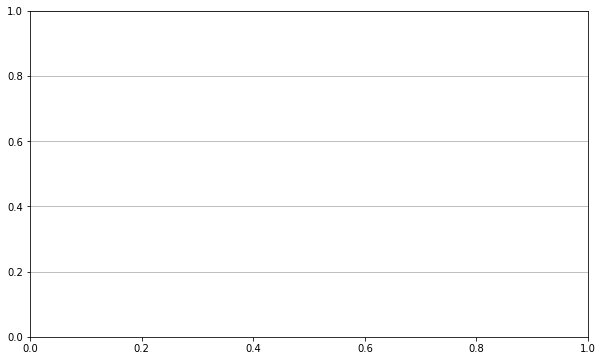

In [88]:
# Emission breakdown for pipeline transport
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)

